<a href="https://colab.research.google.com/github/yosia-jk/main/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library and Dataset

In [1]:
#Import Library
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and metrics library
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

#Models library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Reading Churn Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/SangsakaWira/Materi-AI-Codedirect/master/Dataset/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Checking Missing Data and Data Types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Generic Descriptive Statistics
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Dividing Columns into Categorical and Numerical
catcol = [col for col in dataset.columns if dataset[col].dtypes=='O']
numcol = [col for col in dataset.columns if col not in catcol]
catcol

['Surname', 'Geography', 'Gender']

## EDA

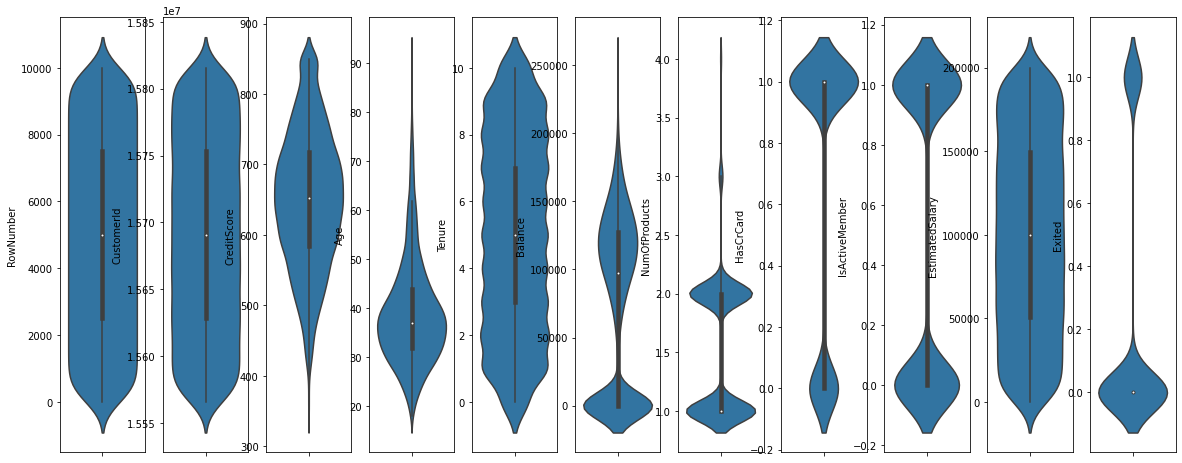

In [6]:
i=1
plt.figure(figsize=(20,8))
for col in numcol:
  plt.subplot(1,len(numcol),i)
  sns.violinplot(y=col, data=dataset)
  i+=1

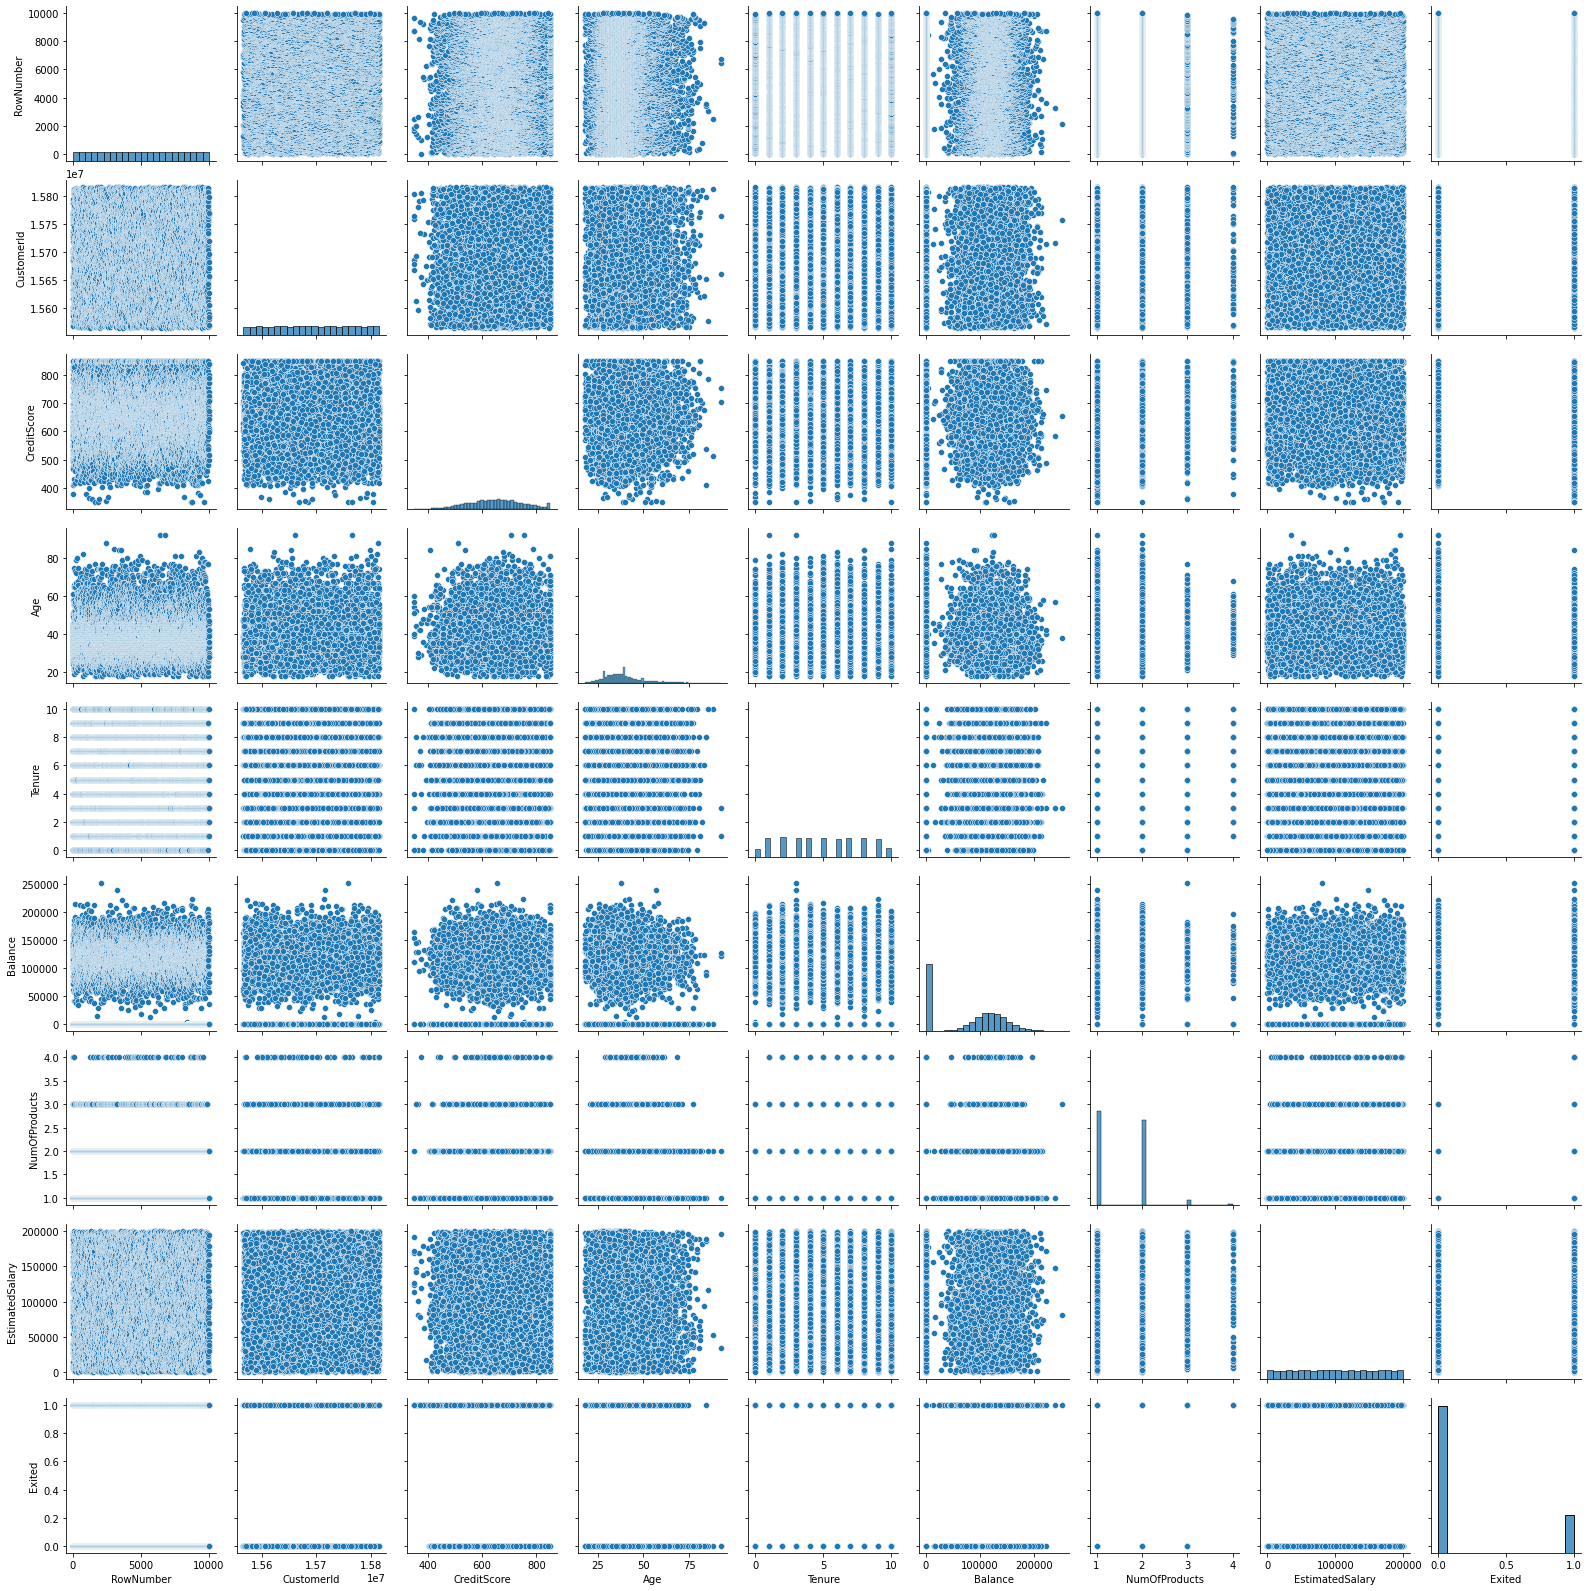

In [7]:
cont= dataset[numcol].drop(['HasCrCard','IsActiveMember'], axis=1)
sns.pairplot(cont)

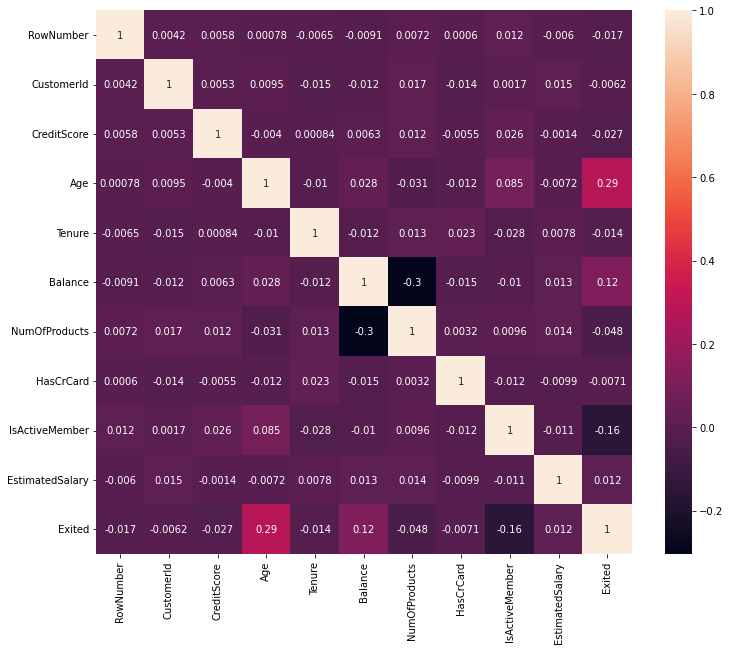

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True)

Exited
0    7963
1    2037
dtype: int64

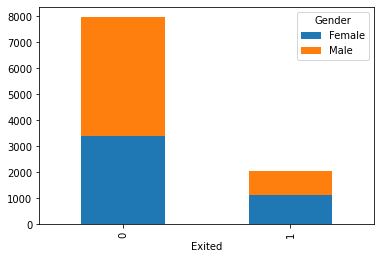

In [48]:
dataset.groupby(["Exited", "Gender"]).size().unstack(1).plot(kind="bar", stacked=True)
dataset.groupby('Exited').size()

## Data Preprocessing

In [9]:
le = LabelEncoder()
df=dataset.copy()

df['Gender']=le.fit_transform(df['Gender'])

Geography = pd.get_dummies(dataset["Geography"])

df.join(Geography)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [10]:
#Preparing and Spliting Dataset
X = df.drop(['Exited','RowNumber','CustomerId','Surname','Geography'], axis=1)
y = df['Exited']


xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=5)

In [11]:
def resmodel(X,y,test_size,models):
  xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size, random_state=8)
  
  for model in models:
    pipe= Pipeline([
      ('scale', StandardScaler()),
      ('model', model)
    ])
    pipe.fit(xtrain, ytrain)
    ypred=pipe.predict(xtest)
    print('Accuracy',model,accuracy_score(ytest,ypred))
    print('Precision',model,precision_score(ytest,ypred),'\n')

In [12]:
#Listing Models
models = [KNeighborsClassifier(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(), AdaBoostClassifier(), GaussianNB()]

In [13]:
#Comparing Models
resmodel(X,y,0.2,models)

Accuracy KNeighborsClassifier() 0.8325
Precision KNeighborsClassifier() 0.6756756756756757 

Accuracy DecisionTreeClassifier() 0.7895
Precision DecisionTreeClassifier() 0.49047619047619045 

Accuracy SVC() 0.854
Precision SVC() 0.8418079096045198 

Accuracy RandomForestClassifier() 0.861
Precision RandomForestClassifier() 0.7922077922077922 

Accuracy AdaBoostClassifier() 0.8555
Precision AdaBoostClassifier() 0.7246376811594203 

Accuracy GaussianNB() 0.8175
Precision GaussianNB() 0.6666666666666666 



In [15]:
#Hyperparameter Tuning with GridSearchCV

param=dict(model__C=[0.1,1.0,10.0],model__kernel=['rbf','linear','poly'], model__degree=[2,3,4])

pipe = Pipeline([
  ('scale', StandardScaler()),
  ('model', SVC())
])
#pipe.get_params()

grid = GridSearchCV(estimator=pipe,
  param_grid=param,
  scoring='accuracy',
  cv=5)
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.1, 1.0, 10.0],
                         'model__degree': [2, 3, 4],
                         'model__kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [19]:
#Hyperparameter Tuning Result
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__degree,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.814277,0.282903,0.481744,0.124392,0.1,2,rbf,"{'model__C': 0.1, 'model__degree': 2, 'model__...",0.8390,0.8450,0.8395,0.8485,0.8400,0.8424,0.003734,10
1,0.815480,0.008306,0.181464,0.004337,0.1,2,linear,"{'model__C': 0.1, 'model__degree': 2, 'model__...",0.7960,0.7960,0.7965,0.7965,0.7965,0.7963,0.000245,19
2,1.590942,0.040568,0.183728,0.003642,0.1,2,poly,"{'model__C': 0.1, 'model__degree': 2, 'model__...",0.8190,0.8190,0.8200,0.8220,0.8185,0.8197,0.001249,16
3,3.276533,0.156523,0.923218,0.061501,0.1,3,rbf,"{'model__C': 0.1, 'model__degree': 3, 'model__...",0.8390,0.8450,0.8395,0.8485,0.8400,0.8424,0.003734,10
4,0.864013,0.107561,0.174848,0.000478,0.1,3,linear,"{'model__C': 0.1, 'model__degree': 3, 'model__...",0.7960,0.7960,0.7965,0.7965,0.7965,0.7963,0.000245,19
5,1.218046,0.025986,0.179118,0.002874,0.1,3,poly,"{'model__C': 0.1, 'model__degree': 3, 'model__...",0.8395,0.8420,0.8380,0.8470,0.8335,0.8400,0.004461,14
6,1.642587,0.025610,0.419528,0.001140,0.1,4,rbf,"{'model__C': 0.1, 'model__degree': 4, 'model__...",0.8390,0.8450,0.8395,0.8485,0.8400,0.8424,0.003734,10
7,0.798316,0.008540,0.182151,0.003334,0.1,4,linear,"{'model__C': 0.1, 'model__degree': 4, 'model__...",0.7960,0.7960,0.7965,0.7965,0.7965,0.7963,0.000245,19
8,1.434765,0.021485,0.193121,0.003085,0.1,4,poly,"{'model__C': 0.1, 'model__degree': 4, 'model__...",0.8215,0.8230,0.8220,0.8245,0.8215,0.8225,0.001140,15
9,1.837070,0.040687,0.374038,0.008242,1.0,2,rbf,"{'model__C': 1.0, 'model__degree': 2, 'model__...",0.8505,0.8565,0.8510,0.8585,0.8480,0.8529,0.003942,2


In [23]:
pipe2 = Pipeline([
  ('scale', StandardScaler()),
  ('model', SVC(C= 1.0, degree= 3, kernel= 'rbf'))
])
pipe2.fit(xtrain,ytrain)
ypred2=pipe2.predict(xtest)

print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.78      0.38      0.51       405

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



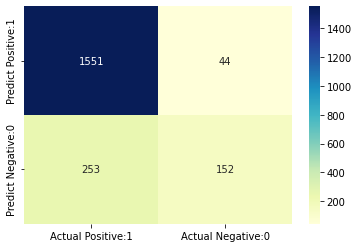

In [24]:
cm = confusion_matrix(ytest, ypred2)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')